<a href="https://colab.research.google.com/github/Oyeniran20/Machine-Learning/blob/main/MNIST_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
# check shape
X_train.shape

(60000, 28, 28)

In [3]:
y_train[2]

4

In [4]:
# Normalize the data to [0, 1]
X_train = X_train/255
X_test = X_test/255

In [5]:
# Expand dimensions for channel (grayscale images)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [8]:
# Check dataset shapes
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28, 1), Training labels shape: (60000, 10)
Testing data shape: (10000, 28, 28, 1), Testing labels shape: (10000, 10)


In [10]:
import matplotlib.pyplot as plt

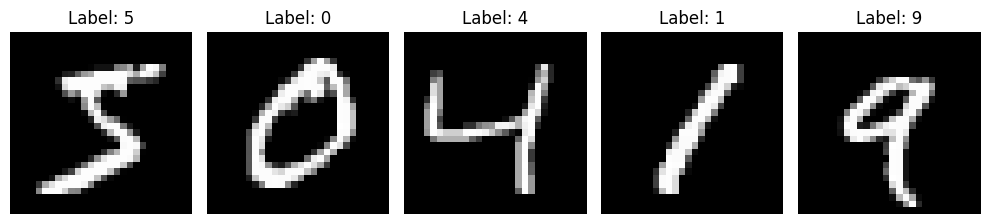

In [12]:
# Visualize some samples
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_train[i])}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

Build the Architecture

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Dense, Flatten

In [14]:
model = Sequential([
    # 1st convolution layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # 2nd convolution layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and fully connected layers

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') # Output Layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

Train the model

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,
                               verbose=1, mode='auto', min_delta=0.00001)

In [19]:
# fit the model
history = model.fit(
    X_train, y_train,
    validation_split = 0.2,
    epochs = 25,
    verbose = 1,
    callbacks=[early_stopping],
    batch_size=128
)

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 118ms/step - accuracy: 0.6309 - loss: 1.0850 - val_accuracy: 0.9732 - val_loss: 0.0967
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 116ms/step - accuracy: 0.9430 - loss: 0.2048 - val_accuracy: 0.9792 - val_loss: 0.0730
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 108ms/step - accuracy: 0.9626 - loss: 0.1382 - val_accuracy: 0.9854 - val_loss: 0.0539
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9704 - loss: 0.1106 - val_accuracy: 0.9862 - val_loss: 0.0514
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.9760 - loss: 0.0924 - val_accuracy: 0.9864 - val_loss: 0.0511
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.9787 - loss: 0.0844 - val_accuracy: 0.9864 - val_loss: 0.0494
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.9802 - loss: 0.0760 - val_accuracy: 0.9883 - val_loss: 0.0453
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.9822 - loss: 0

Evaluate the Model

In [20]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_accuracy, test_loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9896 - loss: 0.0374


(0.9909999966621399, 0.03185047209262848)

Visualize the model

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

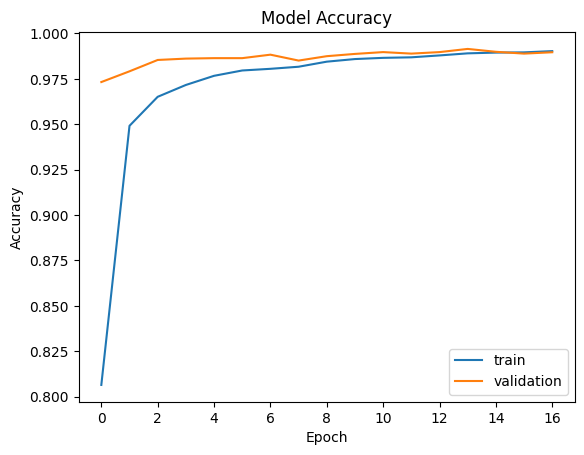

In [22]:
# plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

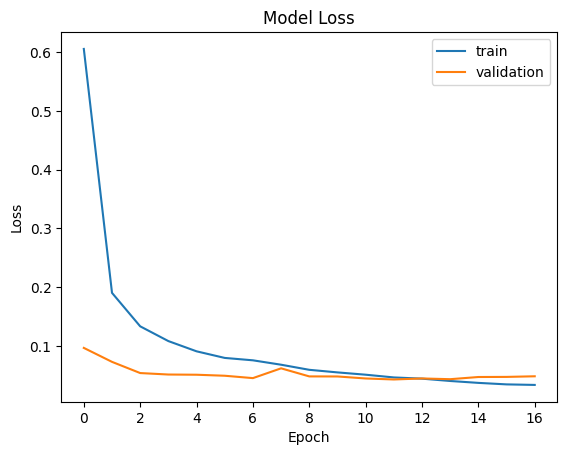

In [23]:
# plot the accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

Make Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
9149


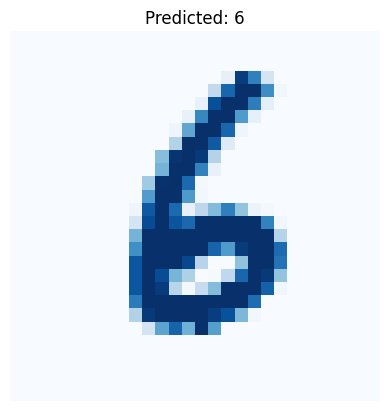

In [31]:
# predict on test data

pred = model.predict(X_test)

# Display a test image with its predicted label
random_row = np.random.randint(0, X_test.shape[0])
plt.imshow(X_test[random_row], cmap='Blues')
plt.title(f'Predicted: {np.argmax(pred[random_row])}')
plt.axis('off')
print(random_row)
plt.show()

In [25]:
y_test[random_row]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])